## load packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.ensemble import RandomForestClassifier

## Q1

In [2]:
# Q1-1
df = pd.read_csv('wine.csv')
df.head(10)

,Target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [3]:
# Q1-2
X = df[['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins',
          'Color intensity','Hue','OD of diluted wines','Proline']]
y = df[['Target']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test.head(10)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD of diluted wines,Proline
19,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845
45,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080
140,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600
30,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285
67,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510
16,14.30,1.92,2.72,20.0,120,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280
119,12.00,3.43,2.00,19.0,87,2.00,1.64,0.37,1.87,1.28,0.93,3.05,564
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
109,11.61,1.35,2.70,20.0,94,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680
141,13.36,2.56,2.35,20.0,89,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780


In [4]:
# Q1-3
tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree.fit(X_train,y_train)
error = 0
for i, v in enumerate(tree.predict(X_test)):
    if v!= y_test['Target'].values[i]:
        error+=1
print(error)

8


In [5]:
# Q1-4
y_pred = tree.predict(X_test)
confusion_mtx = confusion_matrix(y_test, y_pred)
print(confusion_mtx)

[[18  1  0]
 [ 2 17  2]
 [ 2  1 11]]


In [6]:
# Q1-5
accuracy = accuracy_score(y_test, y_pred)
print("正確率：{:.4f}".format(accuracy))

正確率：0.8519


In [7]:
# Q1-6
report = classification_report(y_test, y_pred, digits=4)
print(report)

              precision    recall  f1-score   support

           1     0.8182    0.9474    0.8780        19
           2     0.8947    0.8095    0.8500        21
           3     0.8462    0.7857    0.8148        14

    accuracy                         0.8519        54
   macro avg     0.8530    0.8475    0.8476        54
weighted avg     0.8552    0.8519    0.8507        54



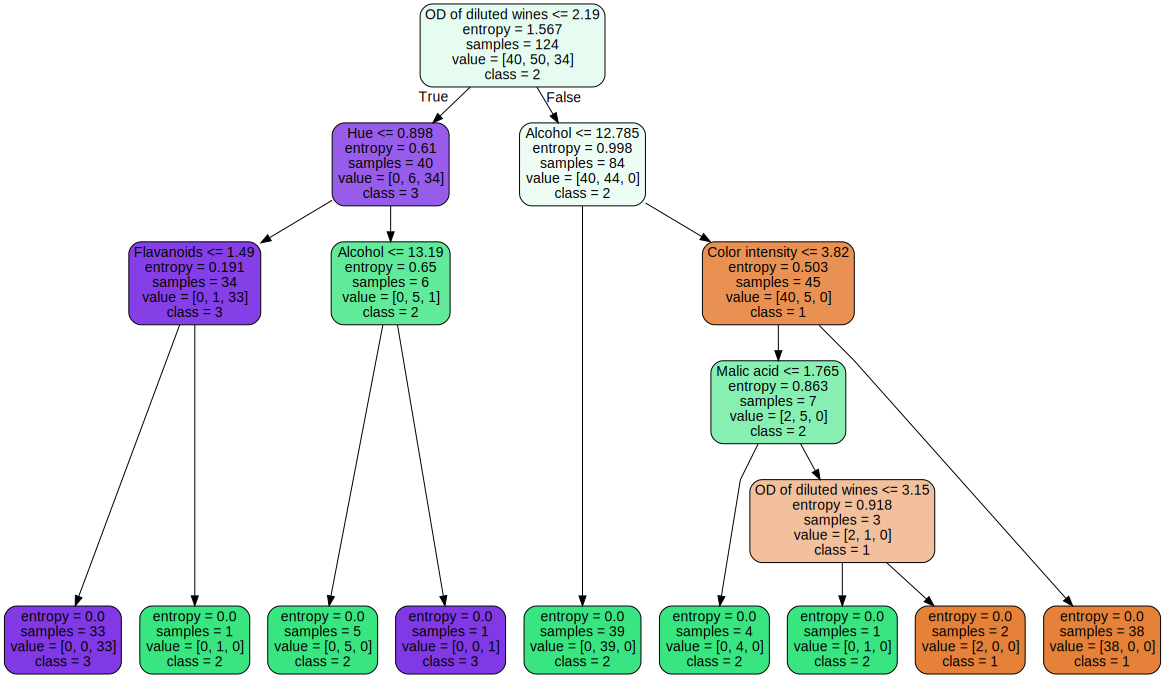

In [8]:
# Q1-7
tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree.fit(X_train,y_train)
features = list(df.columns[1:14])
export_graphviz(tree, out_file='tree.dot', feature_names=features,
                class_names=["1", "2", "3"],filled=True, rounded=True, leaves_parallel=True)
Source.from_file('tree.dot')

In [9]:
# Q1-8
new_wine = [[13.71, 5.65, 2.45, 20.5, 95, 1.68, .61, .52, 1.06, 7.7, .64, 1.74, 720]]
predicted_class = tree.predict(new_wine)
print("Predicted class:", predicted_class)

Predicted class: [3]


c:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [10]:
# Q1-9
rf = RandomForestClassifier(criterion='entropy', random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
error_count_rf = sum(y_pred_rf != y_test.values.ravel())
print("錯誤個數:", error_count_rf)

錯誤個數: 0


C:\Users\danny\AppData\Local\Temp\ipykernel_3532\2901245108.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


In [11]:
# Q1-10
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('正確率(Accuracy): ',"%.4f" % accuracy_rf)

正確率(Accuracy):  1.0000


## Q2

In [12]:
# Q2-1
df = pd.read_csv('Mall_Customers.csv')
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


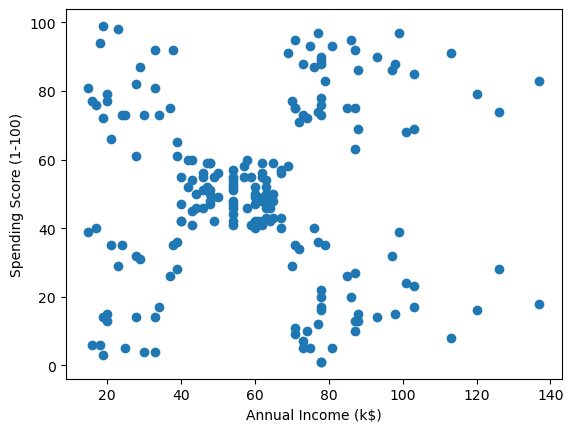

In [13]:
# Q2-2
x = df['Annual Income (k$)']
y = df['Spending Score (1-100)']

# 繪製散佈圖
plt.scatter(x, y)

# 設定X軸和Y軸的標籤
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

# 顯示圖形
plt.show()

In [14]:
# Q2-3
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(data)
cluster_centers = kmeans.cluster_centers_
for i, center in enumerate(cluster_centers):
    print(f'Cluster {i+1} center: {center}')

Cluster 1 center: [88.2        17.11428571]
Cluster 2 center: [55.2962963  49.51851852]
Cluster 3 center: [86.53846154 82.12820513]
Cluster 4 center: [25.72727273 79.36363636]
Cluster 5 center: [26.30434783 20.91304348]


In [15]:
# Q2-4
df['cluster'] = kmeans.predict(data)
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
5,6,Female,22,17,76,3
6,7,Female,35,18,6,4
7,8,Female,23,18,94,3
8,9,Male,64,19,3,4
9,10,Female,30,19,72,3


c:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


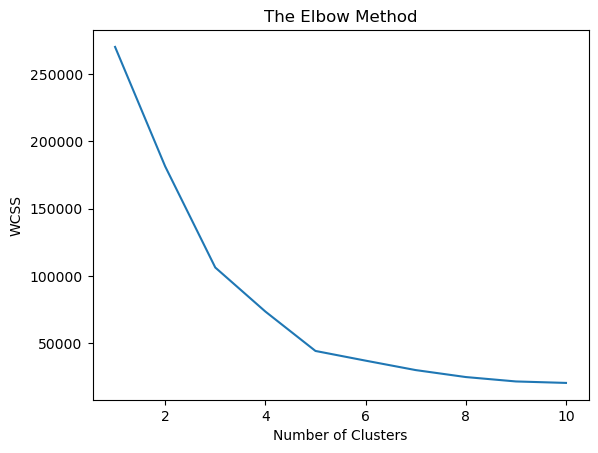

In [16]:
# Q2-5
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# 繪製群集數與WCSS的圖形
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

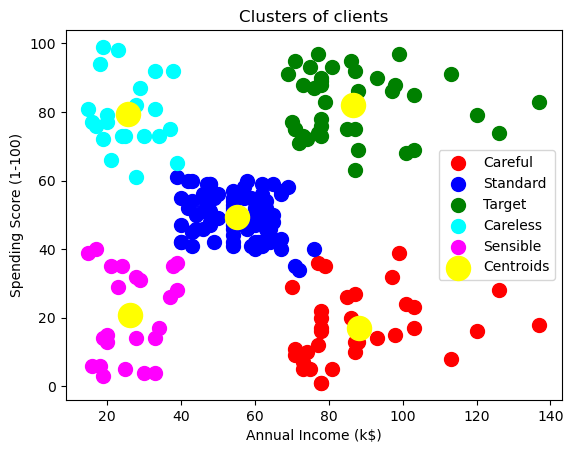

In [17]:
# Q2-7
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(data)
y_kmeans = kmeans.fit_predict(data)
data = np.array(data)
plt.scatter(data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(data[y_kmeans == 2, 0], data[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(data[y_kmeans == 3, 0], data[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(data[y_kmeans == 4, 0], data[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.scatter(kmeans.cluster_centers_[:, 0],  kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()